In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
class Map(object): 
    def __init__(self,size,learning_rate=0.1):
        self.size = size
        self.learning_rate = learning_rate
        self.neighborhood_radius = np.sqrt(1/2.0)*size #diagonal of the map
        self.neurons = np.random.randn(size,size,2)
    
    def find_bmu(self, input_node): #find best matching unit
        min_distance = np.inf
        bum_position = ()
        for row in xrange(self.size):
            for col in xrange(self.size):
                distance = Euclidean_distance(self.neurons[row,col], input_node)
                #print distance
                if distance < min_distance: 
                    min_distance = distance
                    bum_position =(row,col)
                    #print bum_index
        #print "min = ", min_distance
        return bum_position
    
    
    def weight_update(self,input_node,bmu_position,new_radius, new_learning_rate): 
        for row in xrange(self.size):
            for col in xrange(self.size):
                current_position = (row,col)
                #print "DDDDDDD"
                d = Euclidean_distance(bmu_position,np.array(current_position))
                h = self.neighborhood_function(d, new_radius)
                delta_weight = input_node - self.neurons[current_position]
                new_weight = self.neurons[current_position] + new_learning_rate*h*delta_weight
                #print current_position
                #print self.neurons[current_position]
                #print "next"
                self.neurons[current_position] = new_weight
                #print "row {0}, col {1}, weight {2}".format(row,col,self.neurons[current_position]) 
    
    def learning_rate_update(self,turn,iteration):
        new_learning_rate = self.learning_rate * np.exp(-turn/float(iteration))
        return new_learning_rate
    
    def neighborhood_function(self, d, new_radius):
        h = np.exp(-np.square(float(d))/(2*np.square(new_radius)))
        return h
    
    def radius_update(self, turn, iteration):
        new_radius = self.neighborhood_radius * np.exp(-turn*np.log10(self.neighborhood_radius)/iteration)
        return new_radius
    
    def Kohonen_learning(self, training_set, iteration=1000):
        #print self.neurons
        for turn in xrange(iteration):
            for input_node in training_set: 
                bmu_position = self.find_bmu(input_node)
                winning_node = self.neurons[bmu_position]
                new_radius = self.radius_update(turn+1, iteration) # turn + 1 to avoid 0
                new_learning_rate = self.learning_rate_update(turn,iteration)
                self.weight_update(input_node,bmu_position,new_radius,new_learning_rate)
            #print "radius = {0}, learning_rate = {1}".format(new_radius, new_learning_rate)
            #print self.neurons
            #print "next"
        print "done"
        return self.neurons
        
        

In [5]:
def Euclidean_distance(pointA,pointB): #np array 
    #print pointA, pointB
    #print np.linalg.norm(pointA-pointB)
    #print "pointA {0}, pointB {1}, d = {2}".format(pointA, pointB,np.linalg.norm(pointA-pointB))
    return np.linalg.norm(pointA-pointB)

Create dataframe

In [6]:
def str_to_float(df): 
    new_df = df.copy()
    return new_df.applymap(lambda x: float(x.replace(',','.')))

In [7]:
def z_score(df):
    new_df = df.copy()
    new_df.x = (new_df.x - new_df.x.mean())/new_df.x.std(ddof=0)
    new_df.y = (new_df.y - new_df.y.mean())/new_df.y.std(ddof=0)
    return new_df

In [8]:
df = pd.read_csv('donneespb4.txt',sep=' ',header=None)
df.columns = ['x','y','Value']

In [9]:
df = str_to_float(df)

In [11]:
df = z_score(df)
df.head()

,x,y,Value
0,1.064435,-1.267294,0.8
1,-1.016185,-0.788290,0.2
2,-1.056870,-0.637423,0.2
3,-1.011227,0.242393,0.2
4,0.067787,1.517892,0.8


In [12]:
train = np.array(df.iloc[:,:-1])
train

array([[ 1.06443548, -1.2672943 ],
       [-1.01618529, -0.78829049],
       [-1.05687009, -0.63742303],
       ..., 
       [ 1.65570175,  0.94867093],
       [-0.96113567, -1.10292421],
       [-0.9346392 ,  1.06192977]])

In [18]:
m = Map(size = 15, learning_rate = 0.1)

In [19]:
result = m.Kohonen_learning(training_set=train, iteration=10)

done


In [20]:
result

array([[[  1.07323495e+00,  -1.14857193e+00],
        [  9.87044992e-01,  -1.13053107e+00],
        [  8.79841183e-01,  -1.10851812e+00],
        [  7.47287776e-01,  -1.08202852e+00],
        [  5.85468767e-01,  -1.05125087e+00],
        [  3.92931529e-01,  -1.01748307e+00],
        [  1.74127345e-01,  -9.83303627e-01],
        [ -5.77108989e-02,  -9.52205155e-01],
        [ -2.82117032e-01,  -9.27465225e-01],
        [ -4.78732858e-01,  -9.10686144e-01],
        [ -6.35384562e-01,  -9.01181493e-01],
        [ -7.50592722e-01,  -8.96765965e-01],
        [ -8.30422550e-01,  -8.95030707e-01],
        [ -8.83803634e-01,  -8.94018086e-01],
        [ -9.19210894e-01,  -8.92173118e-01]],

       [[  1.06611756e+00,  -1.05427396e+00],
        [  9.78885260e-01,  -1.03675172e+00],
        [  8.71400731e-01,  -1.01598842e+00],
        [  7.39858017e-01,  -9.91560018e-01],
        [  5.80769292e-01,  -9.63723324e-01],
        [  3.92633392e-01,  -9.33754756e-01],
        [  1.79024190e-01,  -9.0

In [21]:
t = result.copy()
t.resize(15*15,2)

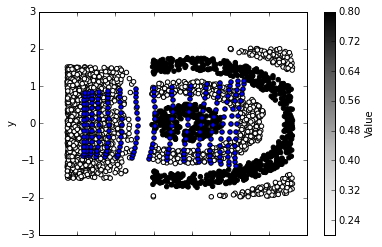

In [22]:
df.plot(kind='scatter',x='x',y='y', c='Value')
plt.scatter(t[:,0],t[:,1])
plt.show()

In [13]:
from PIL import Image

In [14]:
arr = np.random.randint(0,1, 500*500) #example of a 1-D array
arr.resize(500,500)

In [15]:
for index,row in df.iterrows():
    arr[int(row.y),int(row.x)] = row.Value*255

In [20]:
arr

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [21]:
im = Image.fromarray(arr)
im.show()